In [40]:
!pip install pandas numpy scikit-learn matplotlib seaborn requests python-dateutil

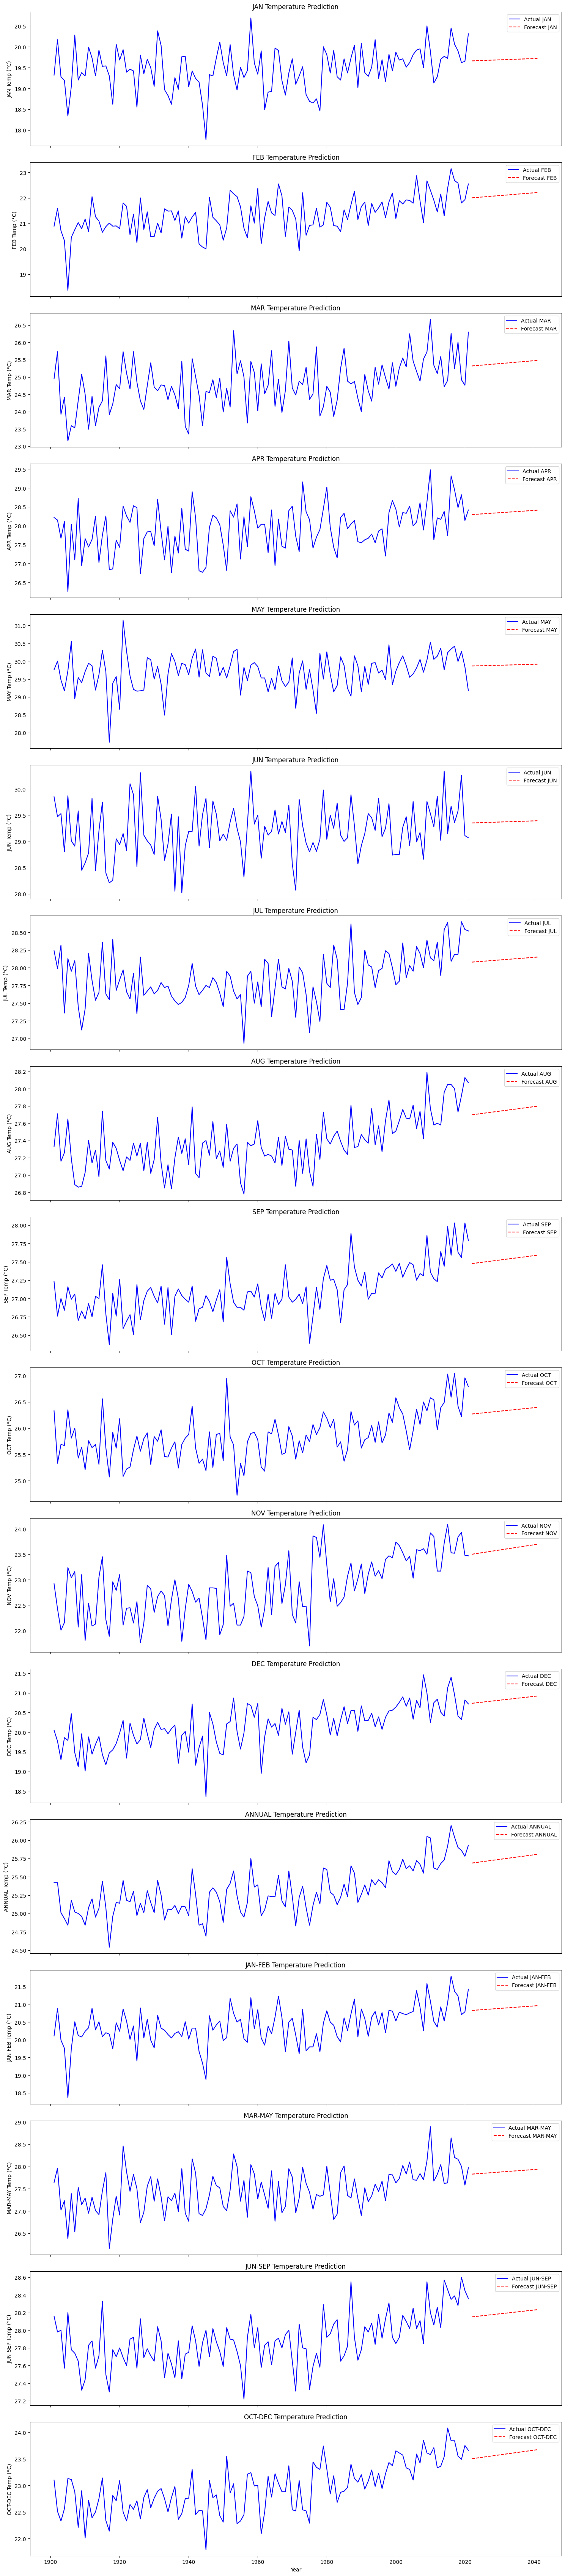

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset (assuming you have a .csv file for the data)
data = pd.read_csv('/content/TEMP_ANNUAL_MEAN_1901-2021.csv')

# Separate features (years) and target (temperature columns)
X = data[['YEAR']]

# Create a DataFrame for prediction years with the same column name
pred_years = pd.DataFrame({
    'YEAR': np.arange(X['YEAR'].max() + 1, X['YEAR'].max() + 21)
})

# Columns for predictions (monthly, seasonal, and annual averages)
columns_to_predict = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
                      'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']

# Store predictions
predictions = pd.DataFrame(pred_years)

# Initialize plot
num_plots = len(columns_to_predict)
fig, axes = plt.subplots(num_plots, 1, figsize=(15, 4 * num_plots), sharex=True)

# Iterate over each column to train the model and make predictions
for idx, col in enumerate(columns_to_predict):
    y = data[[col]]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Forecast for the next 20 years
    forecast = model.predict(pred_years)
    predictions[col] = forecast.flatten()  # Save forecast to predictions DataFrame

    # Plot the actual data and predictions
    ax = axes[idx]
    ax.plot(X['YEAR'], y, label=f'Actual {col}', color='blue')
    ax.plot(pred_years['YEAR'], forecast, label=f'Forecast {col}', color='red', linestyle='--')
    ax.set_ylabel(f'{col} Temp (°C)')
    ax.legend()
    ax.set_title(f'{col} Temperature Prediction')

# Common x-label
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# Save predictions to a new CSV file
predictions.to_csv('temperature_forecasts.csv', index=False)